In [1]:
using Pkg
Pkg.activate("../../Project.toml")

include("../../LogLoss/RealRealHighDimension.jl")
include("../ForecastingMainNew.jl");
using JLD2
using DataFrames
using StatsBase



  Activating project at `~/Documents/QML Project/QuantumInspiredML`


In [2]:
svpath = "../paper/ecg200/mps_saves/legendreNN2_d8_chi35.jld2"

f = jldopen(svpath, "r")
X_train_scaled = read(f, "X_train_scaled")
y_train = read(f, "y_train")
X_test_scaled = read(f, "X_test_scaled")
y_test = read(f, "y_test");
mps = read(f, "mps")
opts = read(f, "opts")
close(f)
fc = load_forecasting_info_variables(mps, X_train_scaled, 
    y_train, X_test_scaled, y_test, opts);

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 100 training samples and 100 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 8, chi_max = 35

 Created 2 forecastable struct(s) containing class-wise mps and test samples.


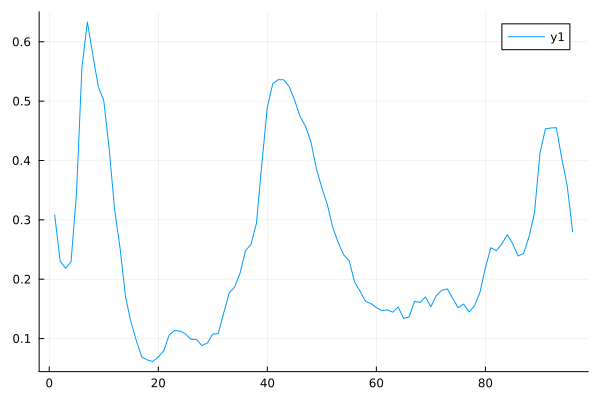

In [4]:
# colvar = Vector{Float64}(undef, size(X_test_scaled, 2))
colvar = var(X_test_scaled; dims=1) ./ mean(abs.(X_test_scaled); dims=1)
plot(colvar')

In [6]:
path = "midpoint_benchmarks/ecg_5_8_11_14_17_20.jld2"

f = jldopen(path, "r") 
    n_midpoints = f["n_midpoints"] 
    stats = f["stats"]
    MSE_stats = f["MSE_stats"]
    ps = f["ps"]
close(f)

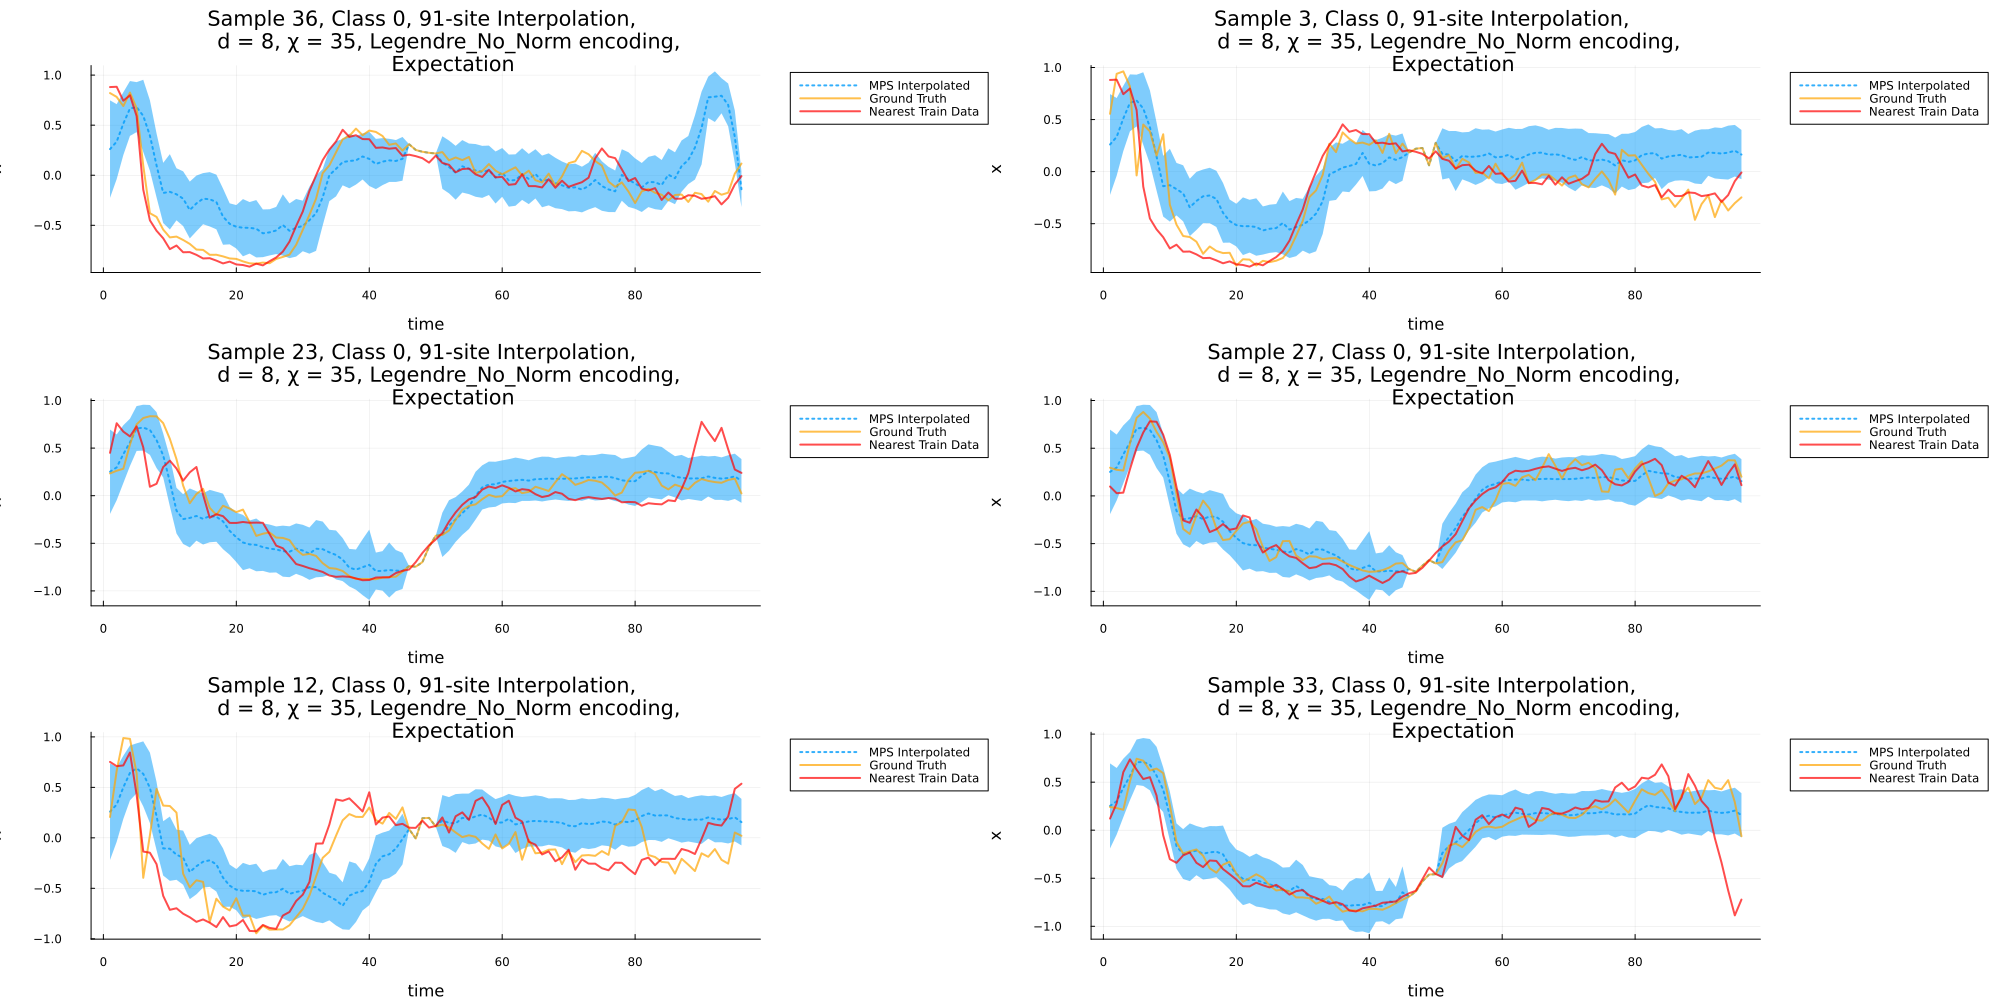

In [7]:
ps1 = ps[1]
p = plot(ps1[1:6]..., size=(2000,1000), layout=(3,2))
savefig(p, "figs/mid.svg")

p = plot(ps1[7:12]..., size=(2000,1000), layout=(3,2))
savefig(p, "figs/mid.svg")
display(p)

In [8]:
for i in eachindex(stats)
    n_mid = n_midpoints[i]
    println("Summary for $n_mid midpoints")
    stats_df = vcat(DataFrame.(stats[i])...)
    MSE_stats_df = vcat(DataFrame.(MSE_stats[i])...)

    print(describe(stats_df));
    println()
    print(describe(MSE_stats_df));

    println("\n")

end

Summary for 5 midpoints
5×7 DataFrame
 Row │ variable  mean       min         median     max        nmissing  eltype   
     │ Symbol    Float64    Float64     Float64    Float64    Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────────
   1 │ MAE       0.165351   0.0738596   0.127333    0.450575         0  Float64
   2 │ MAPE      2.82832    0.35274     1.33245    27.0906           0  Float64
   3 │ MSE       0.0652691  0.00913868  0.0340263   0.346212         0  Float64
   4 │ RMSE      0.0652691  0.00913868  0.0340263   0.346212         0  Float64
   5 │ SMAPE     0.730481   0.308993    0.650827    1.505            0  Float64
5×7 DataFrame
 Row │ variable  mean       min         median     max        nmissing  eltype   
     │ Symbol    Float64    Float64     Float64    Float64    Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────────
   1 │ MAE       0.17908    0.0777832   0.139338    0.45

In [9]:


MPS_mapes = [describe(select(vcat(DataFrame.(s)...), :MAPE), :mean)[1,2] for s in stats]
MSE_mapes =[describe(select(vcat(DataFrame.(s)...), :MAPE), :mean)[1,2] for s in MSE_stats]

6-element Vector{Float64}:
 3.1475189490422895
 2.8366105295289445
 2.887470710531724
 3.009951161852815
 3.119723210056012
 3.1389426561136666

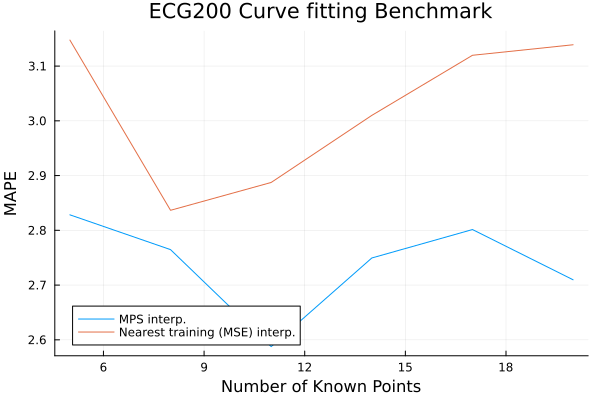

In [37]:
plot(n_midpoints, MPS_mapes; xlabel="Number of Known Points", ylabel="MAPE",label="MPS interp.", title="ECG200 Curve fitting Benchmark")
plot!(n_midpoints, MSE_mapes;label="Nearest training (MSE) interp.")